# PIMA Indians Diabetes Dataset  
### Internship Project – Machine Learning


## Day 1 – Problem Understanding & Data Loading

In [1]:
# Problem Statement:
# Predict whether a person has diabetes based on medical attributes.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")

# Inspect dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)

print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())

# Features and Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("\nFeatures:", X.columns)
print("Target: Outcome")


Dataset Shape: (768, 9)

Column Names:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First 5 Rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

## Day 2 – Univariate & Bivariate Analysis

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose Zero Count: 5
BloodPressure Zero Count: 35
SkinThickness Zero Count: 227
Insulin Zero Count: 374
BMI Zero Count: 11

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  14

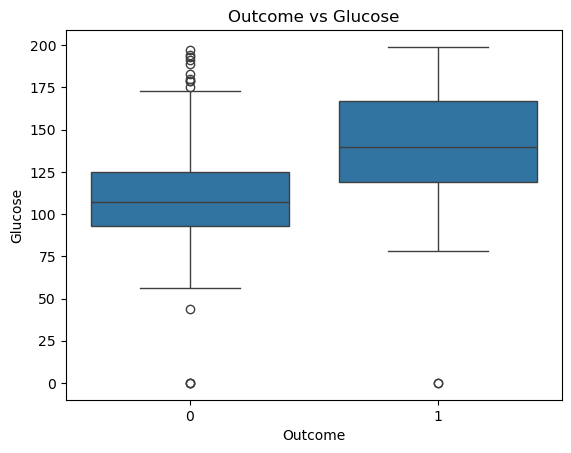

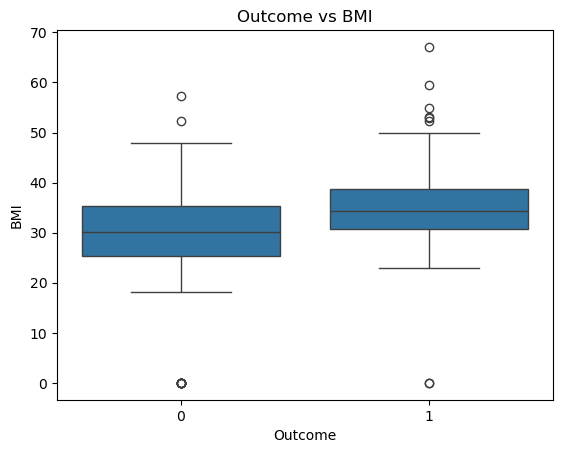

In [3]:
# Missing values
print("Missing Values:\n", df.isnull().sum())

# Identify invalid zero values
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_cols:
    print(col, "Zero Count:", (df[col] == 0).sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Outcome vs Glucose
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Outcome vs Glucose")
plt.show()

# Outcome vs BMI
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("Outcome vs BMI")
plt.show()


## Day 3 – Distribution & Correlation Analysis

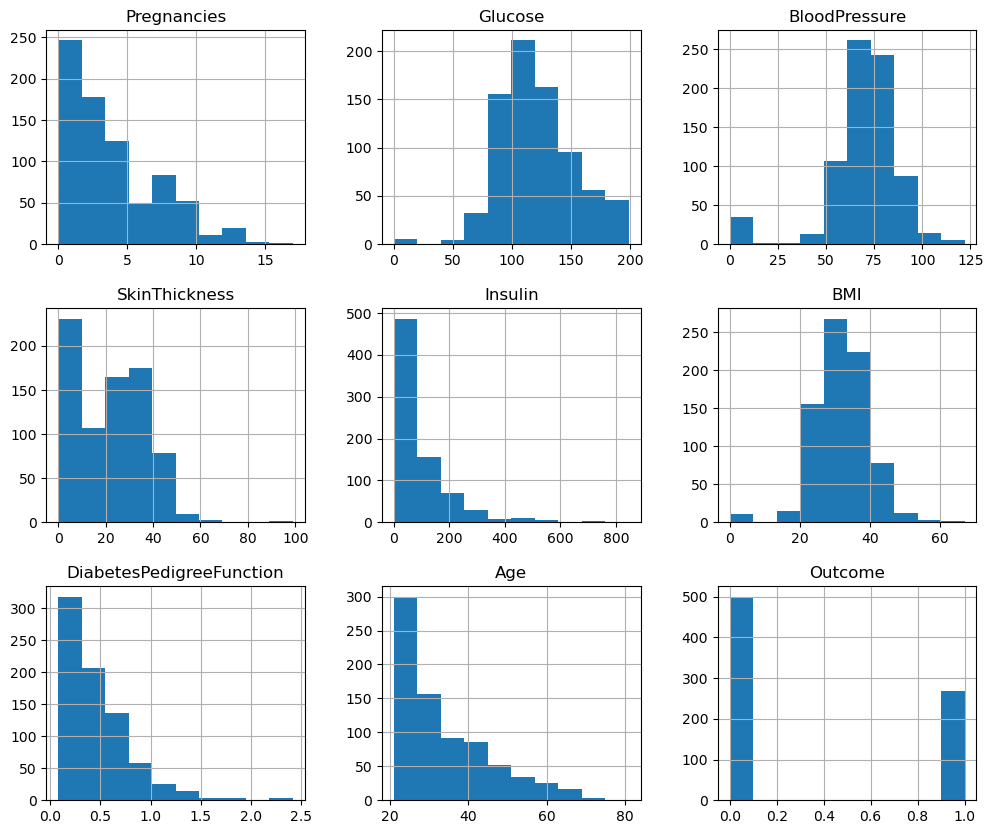

Skewness:
 Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


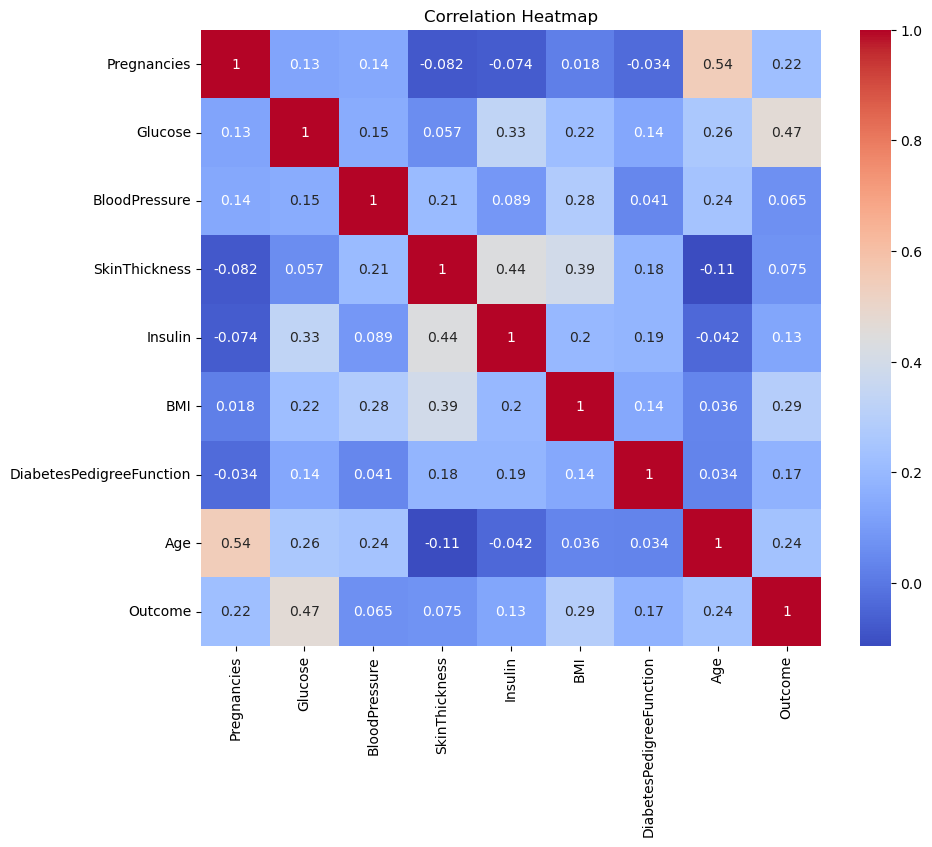

In [5]:
# Histograms
df.hist(figsize=(12,10))
plt.show()

# Skewness
print("Skewness:\n", df.skew())

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Day 4 – Data Cleaning

In [7]:
# Replace zero values with NaN
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)

# Handle missing values
df.fillna(df.median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify cleaning
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Day 5 – Feature Scaling & Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



## Day 6 – KNN & Decision Tree


KNN Accuracy: 0.7337662337662337
Decision Tree Accuracy: 0.7142857142857143


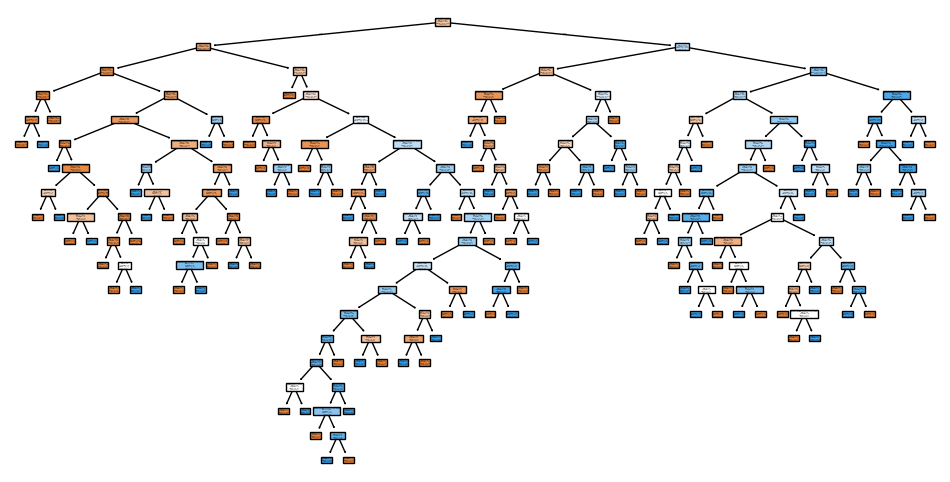

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Tree visualization
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


## Day 7 – Model Comparison & Conclusion


In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Logistic Regression Accuracy: 0.7532467532467533
KNN Accuracy: 0.7337662337662337
Decision Tree Accuracy: 0.7142857142857143
